In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [274]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [277]:
def verify_win_probability(X_test, game_index, model):
    game = X_test.loc[game_index,]
    arg=(np.dot(game,model.coef_.T)) + model.intercept_
    win_prob = sigmoid(arg)[0]
    print("Win probability for game index", game_index, "= ",win_prob)

In [100]:
game_data = pd.read_csv('D1_2015_Processed_Stats.csv')
print("Number of records= ", game_data.shape[0])
game_data.info()

Number of records=  5149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 15 columns):
game_id                      5149 non-null object
game_date                    5149 non-null object
principal_team               5149 non-null object
opponent_team                5149 non-null object
home_team                    5149 non-null bool
principal_score              5149 non-null int64
opponent_score               5149 non-null int64
delta_avg_points_per_game    5149 non-null float64
delta_field_goals_pct        5149 non-null float64
delta_avg_off_rebounds       5149 non-null float64
delta_avg_free_throws_att    5149 non-null float64
delta_avg_free_throws_pct    5149 non-null float64
delta_avg_turnovers          5149 non-null float64
delta_win_pct                5149 non-null float64
game_result                  5149 non-null object
dtypes: bool(1), float64(7), int64(2), object(5)
memory usage: 568.3+ KB


In [101]:
game_data.head()

,game_id,game_date,principal_team,opponent_team,home_team,principal_score,opponent_score,delta_avg_points_per_game,delta_field_goals_pct,delta_avg_off_rebounds,delta_avg_free_throws_att,delta_avg_free_throws_pct,delta_avg_turnovers,delta_win_pct,game_result
0,59217c6a-34da-48ef-8753-a7b1e5bb5998,2015-11-15,UNC Asheville,Western Carolina,False,81,90,6.0,0.075,-3.0,4.0,-0.008,2.0,0.0,LOSS
1,1bb9c45c-80e8-40e4-80f3-84a795135434,2015-11-15,South Dakota,Cal State Northridge,True,76,72,-4.0,-0.041,-5.0,-13.0,0.111,1.0,0.0,WIN
2,347c62d0-c3ca-4688-9fa0-aa21fa5746f9,2015-11-15,Wright State,Cal State Northridge,True,67,72,6.0,-0.052,-7.0,-6.0,0.276,-5.0,1.0,LOSS
3,2bb9a40e-50d9-4a5b-95a5-a49e609df45f,2015-11-15,Northern Illinois,Wright State,True,65,59,0.5,0.030,8.5,1.5,-0.144,4.0,0.0,WIN
4,07c058c3-ad3c-4af0-a78a-feeda651785e,2015-11-15,Clemson,UTSA,True,78,45,10.0,0.011,-1.0,7.0,-0.005,-17.0,1.0,WIN


In [252]:
game_data = game_data[game_data['game_date'] > '2015-12-15']
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 1222 to 5148
Data columns (total 15 columns):
game_id                      3927 non-null object
game_date                    3927 non-null object
principal_team               3927 non-null object
opponent_team                3927 non-null object
home_team                    3927 non-null bool
principal_score              3927 non-null int64
opponent_score               3927 non-null int64
delta_avg_points_per_game    3927 non-null float64
delta_field_goals_pct        3927 non-null float64
delta_avg_off_rebounds       3927 non-null float64
delta_avg_free_throws_att    3927 non-null float64
delta_avg_free_throws_pct    3927 non-null float64
delta_avg_turnovers          3927 non-null float64
delta_win_pct                3927 non-null float64
game_result                  3927 non-null object
dtypes: bool(1), float64(7), int64(2), object(5)
memory usage: 464.0+ KB


In [253]:
numeric_feature_to_scale = ['delta_avg_points_per_game','delta_avg_off_rebounds','delta_avg_free_throws_att','delta_avg_turnovers']

game_data_scale = game_data[numeric_feature_to_scale].copy()
scaler =StandardScaler()
scaled_features = scaler.fit_transform(game_data_scale.values)
scaled_df = pd.DataFrame(scaled_features, index=game_data_scale.index, columns=game_data_scale.columns)

# Add the categorical columns and previously scaled numerics 
scaled_df['home_team'] = game_data['home_team']
scaled_df['delta_field_goals_pct'] = game_data['delta_field_goals_pct']
scaled_df['delta_avg_free_throws_pct'] = game_data['delta_avg_free_throws_pct']

scaled_df['delta_win_pct'] = game_data['delta_win_pct']

scaled_df.drop(columns=['delta_avg_points_per_game', 'delta_avg_free_throws_att'],inplace=True)
scaled_df.head()


,delta_avg_off_rebounds,delta_avg_turnovers,home_team,delta_field_goals_pct,delta_avg_free_throws_pct,delta_win_pct
1222,-0.197993,-1.413464,False,-0.051111,0.073222,0.000000
1223,-0.448820,0.698306,False,0.103625,0.017083,0.250000
1224,0.948647,0.796149,True,-0.006690,-0.113190,-0.190476
1225,0.955314,-3.174631,True,0.005857,-0.059603,0.380952
1226,1.196141,0.655500,False,-0.018750,-0.138000,-0.250000


In [254]:
X = scaled_df
y= game_data['game_result'].copy()
y = pd.get_dummies(y, columns=['game_result'], drop_first=True)
y=y.WIN
X = pd.get_dummies(X, columns=['home_team'], drop_first=True)
print(X.shape)
X.head()

(3927, 6)


,delta_avg_off_rebounds,delta_avg_turnovers,delta_field_goals_pct,delta_avg_free_throws_pct,delta_win_pct,home_team_True
1222,-0.197993,-1.413464,-0.051111,0.073222,0.000000,0
1223,-0.448820,0.698306,0.103625,0.017083,0.250000,0
1224,0.948647,0.796149,-0.006690,-0.113190,-0.190476,1
1225,0.955314,-3.174631,0.005857,-0.059603,0.380952,1
1226,1.196141,0.655500,-0.018750,-0.138000,-0.250000,0


In [279]:
print(y.shape)
#y.head()

(3927,)


In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)


In [257]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(3141, 6)


,delta_avg_off_rebounds,delta_avg_turnovers,delta_field_goals_pct,delta_avg_free_throws_pct,delta_win_pct,home_team_True
1686,-0.097238,0.523190,-0.074144,-0.122121,-0.393939,1
4480,-0.134789,0.160172,0.057728,0.014168,0.277473,1
4091,1.543739,0.139123,-0.045797,-0.109147,0.039474,0
2709,-0.948760,1.121332,0.071029,0.033127,0.196078,0
2191,-0.883618,-1.369560,-0.011154,0.013231,-0.307692,1


Create LR Model

In [261]:
logreg = LogisticRegression()

result = logreg.fit(X_train,y_train)

print("Coeffs ",logreg.coef_)
print("Intercept ", logreg.intercept_)

Coeffs  [[ 0.2176928  -0.25695821  2.30319854  0.32985503  3.10119089  1.16963584]]
Intercept  [-0.54549372]


Generate Baseline Predictions (Revisit)
Baseline by randomly choosing a team
Baseline by choosing home tema wins

In [262]:
y_pred = logreg.predict(X_test)
print("LR model accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

LR model accuracy is 0.68


In [264]:
prediction_probabilities = logreg.predict_proba(X_test)
prediction_probabilities[:,1]
pred_probs = pd.Series(prediction_probabilities[:,1], index=X_test.index)
#pred_probs.loc[2740]

Result Report

In [280]:
print(y_pred.shape)
predictions = pd.Series(y_pred, index=y_test.index)

(786,)


In [267]:
# Retrieve the non-normalized game stats
test_games = game_data[game_data.index.isin(X_test.index)].copy()
test_games.shape

test_games['predicted_result'] = predictions
test_games['pred_win_prob'] = pred_probs
test_games.head()


,game_id,game_date,principal_team,opponent_team,home_team,principal_score,opponent_score,delta_avg_points_per_game,delta_field_goals_pct,delta_avg_off_rebounds,delta_avg_free_throws_att,delta_avg_free_throws_pct,delta_avg_turnovers,delta_win_pct,game_result,predicted_result,pred_win_prob
1223,44baa74b-74e6-42a6-8dc2-f581d3c32e9b,2015-12-16,UC Davis,San Diego,False,55,61,18.000000,0.103625,-1.041667,4.500000,0.017083,1.333333,0.250000,LOSS,1,0.549083
1231,4b551d48-7774-4365-a95c-3fb12d339da7,2015-12-16,UC Riverside,Houston Baptist,False,59,72,9.410714,0.016714,2.125000,-1.964286,-0.041429,-0.964286,0.357143,LOSS,1,0.711475
1238,23ac6027-7c73-4acf-820c-b0d170ccf342,2015-12-16,Stanford,DePaul,True,79,60,-0.063492,-0.020349,4.634921,4.349206,-0.042571,0.079365,0.015873,WIN,1,0.734940
1239,94ef20cb-0fd5-4b8c-87cc-84db0a5fb902,2015-12-16,Northern Kentucky,Michigan,False,62,77,-9.333333,-0.037167,2.388889,1.222222,-0.091000,7.000000,-0.500000,LOSS,0,0.051021
1246,d3a3dccd-b480-4330-a592-d0a795b49ab2,2015-12-16,Memphis,Southern University,True,72,67,7.666667,-0.010042,2.000000,11.250000,0.050917,0.791667,0.083333,WIN,1,0.720852


In [281]:
encode_pred_result = {"predicted_result": {0: "LOSS", 1: "WIN"}}
test_games.replace(encode_pred_result, inplace=True)
test_games[test_games['game_result'] != test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

,game_id,game_date,principal_team,opponent_team,home_team,principal_score,opponent_score,delta_avg_points_per_game,delta_field_goals_pct,delta_avg_off_rebounds,delta_avg_free_throws_att,delta_avg_free_throws_pct,delta_avg_turnovers,delta_win_pct,game_result,predicted_result,pred_win_prob
4965,f1424672-3ec5-4822-af70-a4759bf77e43,2016-03-12,Houston,Tulane,True,69,72,12.104167,0.068852,1.097917,2.643750,0.024115,-2.704167,0.389583,LOSS,WIN,0.920580
4300,508716fe-cf09-4250-b4c2-a77e6abfba29,2016-02-26,Hawaii,UC Riverside,True,71,77,9.392977,0.030634,0.809365,6.734114,-0.032982,-1.192308,0.446488,LOSS,WIN,0.908373
2082,f122419f-7dda-4318-b0e9-1e2787302d20,2016-01-08,LIU Brooklyn,Robert Morris,True,60,70,7.666667,0.002210,3.153846,6.769231,0.042318,-0.533333,0.405128,LOSS,WIN,0.904858
4365,52f185d5-9ca3-4a00-b2de-a6a1e17fdd34,2016-02-27,Radford,Longwood,True,81,92,0.962963,0.002593,2.333333,-1.222222,-0.029741,-1.296296,0.333333,LOSS,WIN,0.884173
4708,3fcdf401-eb94-4bc2-be03-254f45893a63,2016-03-05,Montana,Northern Colorado,True,72,78,-0.520000,0.013167,0.127407,-3.325926,-0.021785,-1.118519,0.380741,LOSS,WIN,0.878831
2093,de7f548d-cd56-4ed3-81f1-1f4a7c47b64b,2016-01-08,Canisius,Manhattan,True,86,94,16.241758,0.003489,4.043956,4.357143,0.013582,-4.483516,0.115385,LOSS,WIN,0.875458
1717,fe28dc18-72bf-4169-9343-391ed6f9eb10,2015-12-31,Dartmouth,Bryant University,True,60,62,7.645455,0.016936,2.345455,6.754545,0.136827,0.145455,0.309091,LOSS,WIN,0.864849
2819,d9d7aa26-9551-4d67-9af2-df808cdbb68d,2016-01-23,High Point,Liberty,False,67,69,15.479167,0.034472,4.972222,5.638889,0.048014,-2.777778,0.458333,LOSS,WIN,0.856493
1855,295f7a2b-377c-49eb-b216-a1b83cc4bb1b,2016-01-02,Alabama A&M,Grambling State,False,78,81,13.666667,0.073028,2.833333,-1.527778,-0.039194,-4.638889,0.375000,LOSS,WIN,0.837284
4643,80a7199f-97ba-4afb-b26d-ed8c610d23c1,2016-03-04,Tennessee State,Austin Peay,True,72,74,-0.437037,-0.001285,-0.011111,-2.359259,0.043319,-1.225926,0.233333,LOSS,WIN,0.819648


In [270]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[267, 142],
       [112, 265]], dtype=int64)

Text(0.5,257.44,'Predicted label')

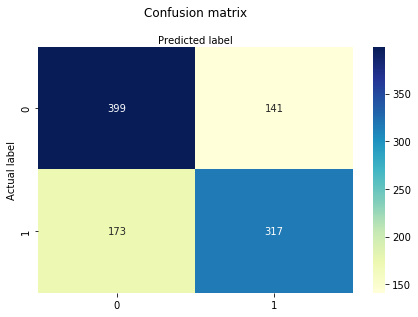

In [244]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [282]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6768447837150128
Precision: 0.6511056511056511
Recall: 0.7029177718832891


In [283]:
print("\n\n---Logistic Model---")
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
print("Base Rate AUC= %2.2f" % logit_roc_auc)
print(metrics.classification_report(y_test, y_pred))



---Logistic Model---
Base Rate AUC= 0.68
             precision    recall  f1-score   support

          0       0.70      0.65      0.68       409
          1       0.65      0.70      0.68       377

avg / total       0.68      0.68      0.68       786



In [278]:
verify_win_probability(X_test, 4965, logreg)

Win probability for game index 4965 =  0.9205796149143125
